In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model, model_selection
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pickle import dump,load
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as Kc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


y=load( open('labels.pkl', 'rb'))
x_train=load( open('x_train.pkl', 'rb'))
x_test=load( open('x_test.pkl', 'rb'))

yLR_train =load( open('y_trainLR.pkl', 'rb'))
yLR_test =load( open('y_testLR.pkl', 'rb'))
y_train = to_categorical(yLR_train, nb_classes)
y_test = to_categorical(yLR_test, nb_classes)


In [209]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg2 = LogisticRegression()

logreg2.fit(x_train,yLR_train)

y_pred=logreg2.predict(x_test)
matriz2=confusion_matrix(yLR_test,y_pred)
display('Matriz de Confusion:')
print(matriz2)

exactitudRL=accuracy_score(yLR_test,y_pred)*100
print('Exactitud del modelo: ',exactitudRL,' %')

'Matriz de Confusion:'

[[11450  5002]
 [  387 21439]]
Exactitud del modelo:  85.92141700193322  %


In [211]:
reporte=classification_report(yLR_test,y_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     16452
           1       0.81      0.98      0.89     21826

    accuracy                           0.86     38278
   macro avg       0.89      0.84      0.85     38278
weighted avg       0.88      0.86      0.85     38278



<AxesSubplot:>

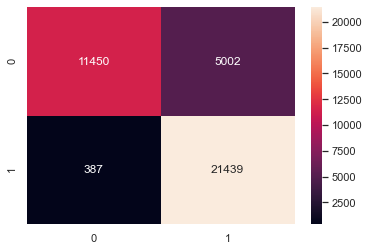

In [212]:
import seaborn as sns
from sklearn.metrics import classification_report


#Creamos la matriz de confusion para la regresion logistica
sns.set_theme(color_codes=True)
sns.heatmap(matriz2, annot=True,fmt='g')

<AxesSubplot:>

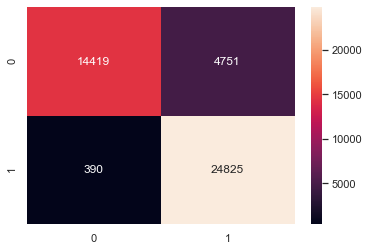

In [213]:
#Creamos la matriz de confusion para el algoritmo genetico
matriz=[[14419,4751],[390,24825]]

sns.set_theme(color_codes=True)
sns.heatmap(matriz, annot=True,fmt='g')


In [214]:
print("\nclasses_:\nA list of class labels known to the classifier.\n"+str(logreg2.classes_))
print("\ncoef_:\nCoefficient of the features in the decision function.\n"+str(logreg2.coef_))
print("\nintercept_:\nIntercept (a.k.a. bias) added to the decision function.\n"+str(logreg2.intercept_))
print("\nn_features_in_:\nNumber of features seen during fit.\n"+str(logreg2.n_features_in_))
#print("\nfeature_names_in_:"+str(logreg2.feature_names_in_))
print("\nn_iter_:\nActual number of iterations for all classes. If binary or multinomial, it \nreturns only 1 element. For liblinear solver, only the maximum number of \niteration across all classes is given.\n"+str(logreg2.n_iter_))



classes_:
A list of class labels known to the classifier.
[0 1]

coef_:
Coefficient of the features in the decision function.
[[ 0.46606581  0.12426299  6.65705778 -2.44340684  7.94083379]]

intercept_:
Intercept (a.k.a. bias) added to the decision function.
[-5.35710001]

n_features_in_:
Number of features seen during fit.
5

n_iter_:
Actual number of iterations for all classes. If binary or multinomial, it 
returns only 1 element. For liblinear solver, only the maximum number of 
iteration across all classes is given.
[28]


In [215]:
from sklearn.metrics import matthews_corrcoef

print("Coeficiente de Matthews de la regresion logistica")
matthews_corrcoef(yLR_test,y_pred)

Coeficiente de Matthews de la regresion logistica


0.726466342027156

In [310]:
input_shape=5
input_layer=5
nb_classes=2
activation = 'relu'
optimizer  = 'adam' 


In [311]:
model = Sequential()
model.add(InputLayer(input_shape=(input_layer,)))
model.add(Dense(10, activation=activation))
model.add(Dense(20, activation=activation))
model.add(Dense(10, activation=activation))
model.add(Dense(10, activation=activation))
# Output layer.
model.add(Dense(nb_classes, activation='softmax'))
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
filepath="best_model.h5"


In [312]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_64 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_66 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_67 (Dense)             (None, 2)                 22        
Total params: 622
Trainable params: 622
Non-trainable params: 0
_________________________________________________________________


In [313]:
INIT_LR = 0.3e-3
EPOCHS = 100
BS = 5000
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='auto')
callbacks_list = [checkpoint,early_stopping]
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
        metrics=["accuracy"]),

(None,)

In [314]:
np.shape(x_train)

(153112, 5)

In [315]:
from sklearn.utils import class_weight

In [316]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(yLR_train),
                                                 yLR_train)
print(class_weights )

[1.16311152 0.87701049]


D:\UserFiles\anaconda\envs\ia\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [317]:
hist = model.fit(x_train, y_train, epochs=EPOCHS,class_weight = dict(enumerate(class_weights)), batch_size=BS, validation_data=(x_test, y_test), callbacks=[callbacks_list], verbose=1)


Epoch 1/100
31/31 [==============================] - 2s 17ms/step - loss: 0.6935 - accuracy: 0.5050 - val_loss: 0.6885 - val_accuracy: 0.6782

Epoch 00001: val_accuracy improved from -inf to 0.67820, saving model to best_model.h5
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 0.6828 - accuracy: 0.7672 - val_loss: 0.6770 - val_accuracy: 0.7998

Epoch 00002: val_accuracy improved from 0.67820 to 0.79978, saving model to best_model.h5
Epoch 3/100
31/31 [==============================] - 0s 9ms/step - loss: 0.6709 - accuracy: 0.8166 - val_loss: 0.6598 - val_accuracy: 0.8334

Epoch 00003: val_accuracy improved from 0.79978 to 0.83340, saving model to best_model.h5
Epoch 4/100
31/31 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.8380 - val_loss: 0.6327 - val_accuracy: 0.8438

Epoch 00004: val_accuracy improved from 0.83340 to 0.84380, saving model to best_model.h5
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 0

In [318]:
model.save_weights("model.h5")
print("Saved model to disk")
predIdxs = model.predict(x_test, batch_size=BS)
pred = np.argmax(predIdxs, axis=1)



Saved model to disk


In [319]:
print(classification_report(y_test.argmax(axis=1), pred ))
   

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     16452
           1       0.84      0.98      0.91     21826

    accuracy                           0.88     38278
   macro avg       0.90      0.87      0.88     38278
weighted avg       0.90      0.88      0.88     38278



In [320]:
matriz2=confusion_matrix(yLR_test,pred)
print(matriz2)

[[12405  4047]
 [  420 21406]]


In [321]:
matthews_corrcoef(yLR_test,pred)

0.7706351581163112

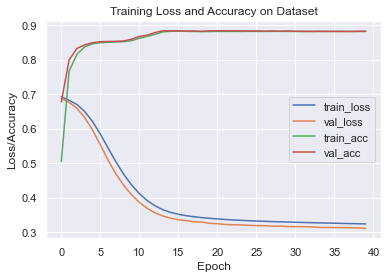

In [322]:
N = len(hist.history["loss"])
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [324]:
accuracy_score(yLR_test,pred)*100

88.33011129108104